İlk 5 Satır:
   Unnamed: 0  Species                     Owner Country.of.Origin  \
0           0  Arabica                 metad plc          Ethiopia   
1           1  Arabica                 metad plc          Ethiopia   
2           2  Arabica  grounds for health admin         Guatemala   
3           3  Arabica       yidnekachew dabessa          Ethiopia   
4           4  Arabica                 metad plc          Ethiopia   

                                  Farm.Name Lot.Number       Mill ICO.Number  \
0                                 metad plc        NaN  metad plc  2014/2015   
1                                 metad plc        NaN  metad plc  2014/2015   
2  san marcos barrancas "san cristobal cuch        NaN        NaN        NaN   
3     yidnekachew dabessa coffee plantation        NaN    wolensu        NaN   
4                                 metad plc        NaN  metad plc  2014/2015   

                                 Company       Altitude  ...  Color  \
0      metad a

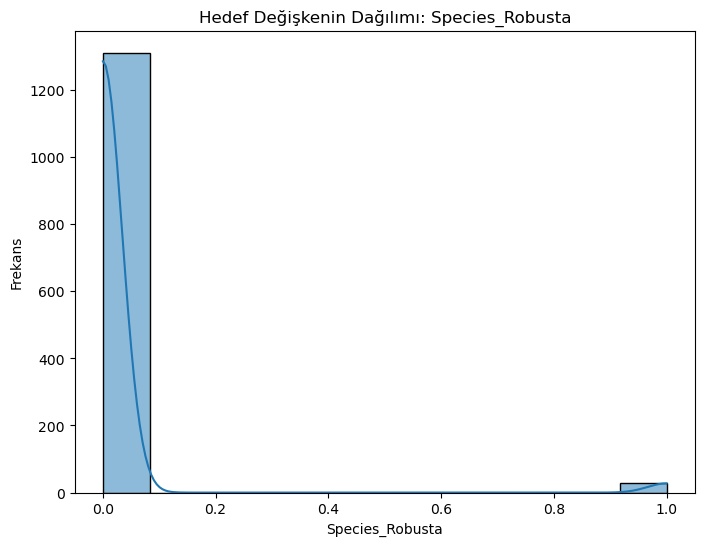

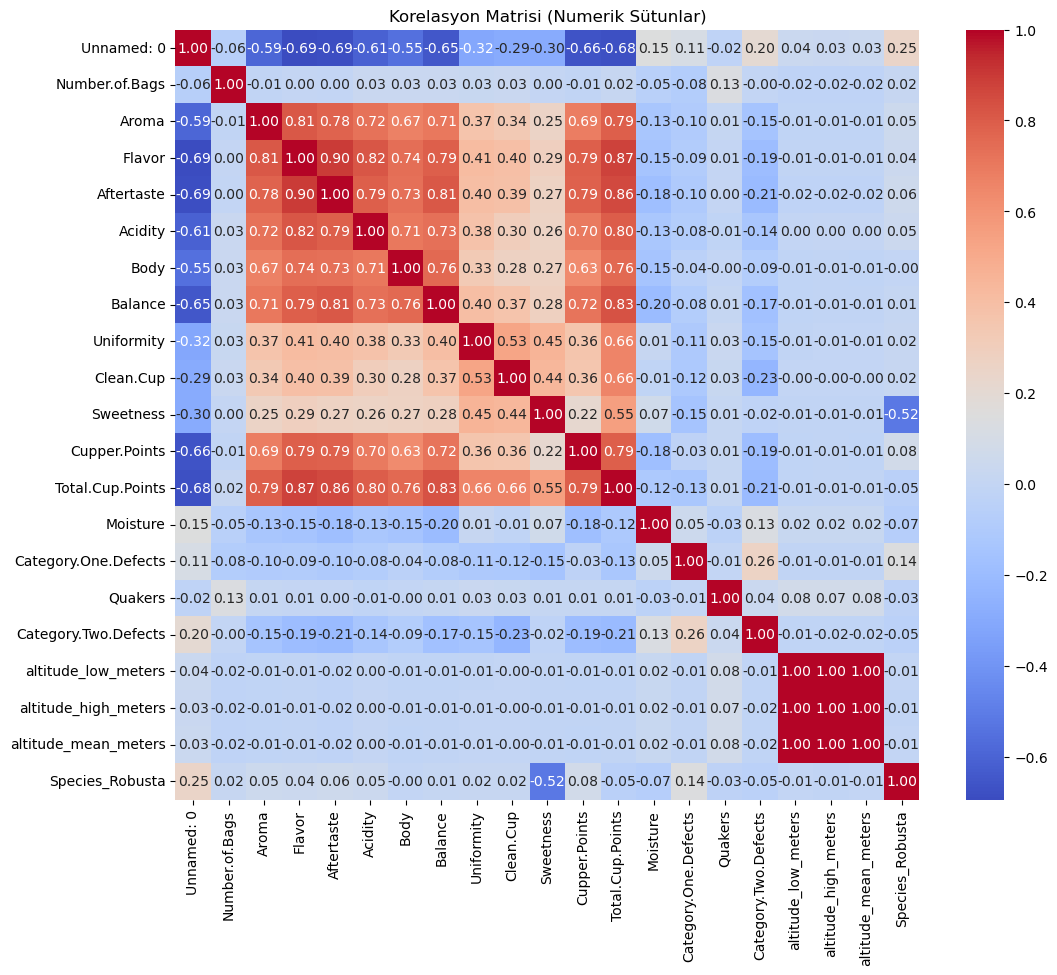


Özelliklerin Boyutu: (1339, 20)
Hedef Değişkenin Boyutu: (1339,)

Model Performans Değerleri:
MSE  : 0.03007354281874529
RMSE : 0.17341725063771854
R²   : 0.07335815554973746


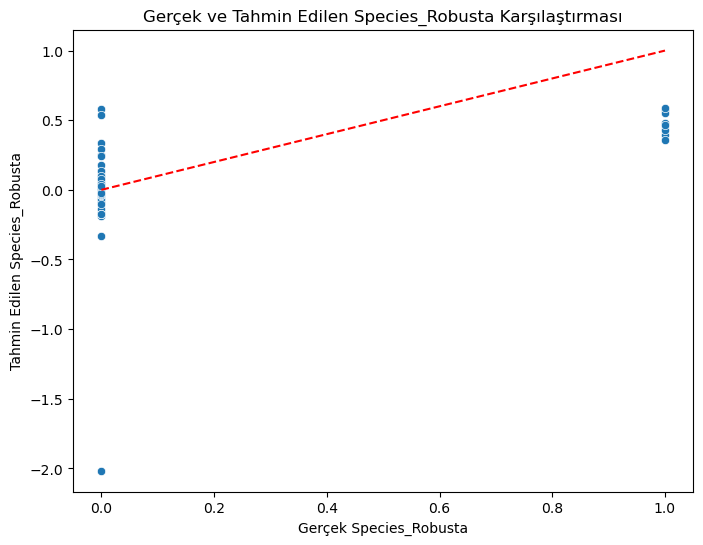


Özelliklerin Model Katsayıları:
                       Katsayı
altitude_mean_meters  5.286654
altitude_high_meters -2.696511
altitude_low_meters  -2.592236
Total.Cup.Points     -0.574045
Clean.Cup             0.181537
Uniformity            0.138977
Cupper.Points         0.119321
Unnamed: 0            0.107814
Aftertaste            0.095306
Acidity               0.088423
Flavor                0.087436
Aroma                 0.082802
Balance               0.076913
Body                  0.073092
Sweetness             0.054052
Category.One.Defects  0.020239
Number.of.Bags        0.008445
Quakers              -0.003083
Category.Two.Defects  0.000364
Moisture             -0.000282


In [12]:
"""
Coffee Quality Analysis Project
=================================
Bu proje, 'merged_data_cleaned.csv' dosyasındaki kahve kalitesi verilerinin 
keşifsel veri analizi (EDA), veri temizliği, önemli kategorik sütunların sayısallaştırılması,
ve lineer regresyon modeli kullanılarak tahmin edilmesi sürecini içerir.

Adımlar:
--------
1. Veri Yükleme ve Genel İnceleme:
   - CSV dosyasından veriyi yükler, ilk satırları ve veri tiplerini görüntüler.
2. Veri Temizliği:
   - Eksik değerleri inceler.
   - %50'den fazla eksik değeri olan sütunları kaldırır.
   - Numerik sütunlardaki eksik değerleri medyan, kategorik sütunlardaki eksik değerleri mod ile doldurur.
3. Önemli Kategorik Sütunların İşlenmesi:
   - Analiz için önemli kabul edilen (ör. "Processing_Method", "Species", "Country_of_Origin") sütunları belirler.
   - Diğer kategorik sütunları kaldırır ve kalanları one-hot encoding ile sayısallaştırır.
4. Keşifsel Veri Analizi (EDA):
   - Hedef değişkenin dağılımı, korelasyon matrisi ve örnek görselleştirmeler oluşturulur.
5. Makine Öğrenmesi Modeli:
   - Özellik ve hedef değişkenler belirlenip eğitim-test setlerine ayrılır.
   - Özellikler ölçeklendirilir, lineer regresyon modeli eğitilir ve performans metrikleri (MSE, RMSE, R²) hesaplanır.
   - Modelin yorumlanabilmesi için katsayılar incelenir.

Kullanılan Kütüphaneler:
------------------------
- pandas, numpy: Veri işlemleri.
- matplotlib, seaborn: Görselleştirme.
- scikit-learn: Modelleme ve değerlendirme.

Yazar  : Your Name
Tarih  : 2025-03-06
"""

# Gerekli kütüphanelerin yüklenmesi
import warnings
warnings.filterwarnings("ignore")  # Gelecekte oluşabilecek uyarıları bastırır

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Notebook ortamında grafiklerin inline görüntülenmesi
%matplotlib inline

# =============================================================================
# 1. Veri Yükleme ve Genel İnceleme
# =============================================================================
csv_path = "merged_data_cleaned.csv"  # CSV dosyasının bulunduğu yer
df = pd.read_csv(csv_path)

print("İlk 5 Satır:")
print(df.head())

print("\nVeri Çerçevesi Bilgisi:")
df.info()

# =============================================================================
# 2. Veri Temizliği
# =============================================================================
print("\nEksik Değer Sayıları:")
missing = df.isnull().sum()
print(missing[missing > 0])

# %50'den fazla eksik değeri olan sütunları tespit edip kaldırma
threshold = 0.5
cols_to_drop = missing[missing > threshold * len(df)].index
if len(cols_to_drop) > 0:
    print("\nKaldırılacak Sütunlar (Yüksek Eksik Değer):")
    print(list(cols_to_drop))
    df = df.drop(columns=cols_to_drop)
else:
    print("\nYüksek eksik orana sahip sütun bulunamadı.")

# Numerik sütunlarda eksik değerleri medyan ile, kategorik sütunlarda mod ile doldurma
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nEksik Değer Doldurma Sonrası:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# =============================================================================
# 3. Önemli Kategorik Sütunların İşlenmesi
# =============================================================================
# Analiz için önemli olduğunu düşündüğünüz kategorik sütunları belirleyin.
important_categorical = ['Processing_Method', 'Species', 'Country_of_Origin']

# DataFrame'deki tüm kategorik sütunları listeleyelim
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Önemli olmayan kategorik sütunları kaldırma
cols_to_remove = [col for col in categorical_cols if col not in important_categorical]
if cols_to_remove:
    print("\nKaldırılacak Kategorik Sütunlar (Önemli Olmayanlar):")
    print(cols_to_remove)
    df = df.drop(columns=cols_to_remove)
else:
    print("\nTüm kategorik sütunlar analiz için önemli kabul edildi.")

# Mevcut önemli kategorik sütunları tespit edelim
existing_important = [col for col in important_categorical if col in df.columns]
missing_important = set(important_categorical) - set(existing_important)
if missing_important:
    print("\nVeri setinde bulunmayan önemli kategorik sütunlar:")
    print(list(missing_important))

# Mevcut önemli kategorik sütunları one-hot encoding ile sayısallaştırma
if existing_important:
    df = pd.get_dummies(df, columns=existing_important, drop_first=True)

print("\nOne-hot Encoding Sonrası Veri Çerçevesi Bilgisi:")
df.info()

# =============================================================================
# 4. Keşifsel Veri Analizi (EDA)
# =============================================================================
# Hedef değişken olarak genellikle 'Total_Cup_Points' kullanılır
target = 'Total_Cup_Points'
if target not in df.columns:
    target = df.columns[-1]
    print(f"\nHedef değişken olarak '{target}' sütunu seçildi.")

# Hedef değişkenin dağılımı
plt.figure(figsize=(8, 6))
sns.histplot(df[target], kde=True)
plt.title("Hedef Değişkenin Dağılımı: " + target)
plt.xlabel(target)
plt.ylabel("Frekans")
plt.show()

# Tüm sayısal sütunlar arasındaki korelasyon matrisi
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Matrisi (Numerik Sütunlar)")
plt.show()

# Örneğin, 'Altitude' sütunu varsa hedef ile ilişkisini görselleştirme
if 'Altitude' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='Altitude', y=target)
    plt.title("Altitude vs " + target)
    plt.xlabel("Altitude")
    plt.ylabel(target)
    plt.show()

# =============================================================================
# 5. Makine Öğrenmesi Modeli: Lineer Regresyon ile Tahmin ve Yorumlama
# =============================================================================
# Modelleme için özellikler (X) ve hedef (y) değişkenini belirleme
X = df.drop(columns=[target])
y = df[target]

print("\nÖzelliklerin Boyutu:", X.shape)
print("Hedef Değişkenin Boyutu:", y.shape)

# Eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lineer Regresyon modelini oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test_scaled)

# Model performansını hesaplama: MSE, RMSE, R²
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performans Değerleri:")
print("MSE  :", mse)
print("RMSE :", rmse)
print("R²   :", r2)

# Gerçek ve tahmin edilen değerleri karşılaştırma görselleştirmesi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Gerçek " + target)
plt.ylabel("Tahmin Edilen " + target)
plt.title("Gerçek ve Tahmin Edilen " + target + " Karşılaştırması")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Modelin yorumlanması için özellik katsayılarını inceleme
coeff_df = pd.DataFrame(model.coef_, index=X.columns, columns=['Katsayı'])
coeff_df = coeff_df.reindex(coeff_df['Katsayı'].abs().sort_values(ascending=False).index)
print("\nÖzelliklerin Model Katsayıları:")
print(coeff_df)
